# Setup

In [1]:
!pip install llama-cpp-python==0.1.78

In [2]:
from urllib.request import urlopen
from shutil import copyfileobj

model_url = "https://huggingface.co/TheBloke/Llama-2-7B-Chat-GGML/resolve/main/llama-2-7b-chat.ggmlv3.q4_0.bin"
model_filename = "llama-2-7b-chat.ggmlv3.q4_0.bin"

with urlopen(model_url) as in_stream, open(model_filename, 'wb') as out_file:
    copyfileobj(in_stream, out_file)

In [3]:
!pwd && ls -lh

/content
total 3.6G
-rw-r--r-- 1 root root 3.6G Aug 26 03:04 llama-2-7b-chat.ggmlv3.q4_0.bin
drwxr-xr-x 1 root root 4.0K Aug 24 21:25 sample_data


In [4]:
from llama_cpp import Llama

llm = Llama(model_path="/content/llama-2-7b-chat.ggmlv3.q4_0.bin")

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


In [5]:
def start_generate(llm, tokens):
  g = llm.generate(tokens)
  t = next(g)
  return t, g

In [6]:
def display_token(llm, tk):
  tx = llm.detokenize([tk])
  print(tk, tx.decode())

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_logits(llm):
  logits = np.array(llm.eval_logits)
  l2 = logits.reshape((80,-1))
  plt.figure(figsize=(12, 3))
  plt.imshow(l2)
  plt.show()

def plot_top_logits(llm, top_n=10):
  logits = np.array(llm.eval_logits)
  tks = np.flip(np.flip(np.argsort(logits))[0,:top_n])
  labels = [llm.detokenize([tk]) for tk in tks]
  strengths = logits[0, tks]
  plt.figure(figsize=(6, 3))
  plt.barh(y=labels, width=strengths)
  plt.show()

# Base case generation

In [8]:
prompt_base = b"### Human: Tell me a story\n### Assistant:"
tokens_base = llm.tokenize(prompt_base)

In [9]:
t11, g1 = start_generate(llm, tokens_base)

In [10]:
display_token(llm, t11)

4587  Of


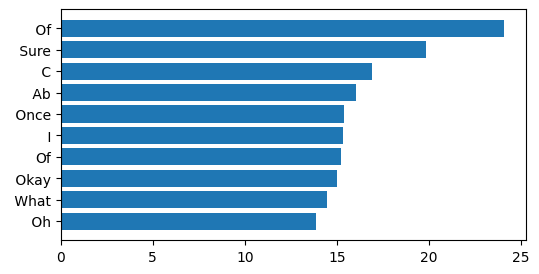

In [11]:
plot_top_logits(llm)

In [12]:
t12 = next(g1)
display_token(llm, t12)

3236  course


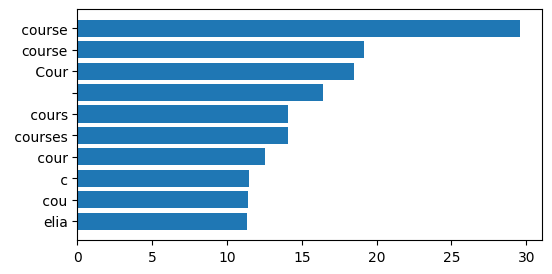

In [13]:
plot_top_logits(llm)

In [14]:
t13 = next(g1)
display_token(llm, t13)

29991 !


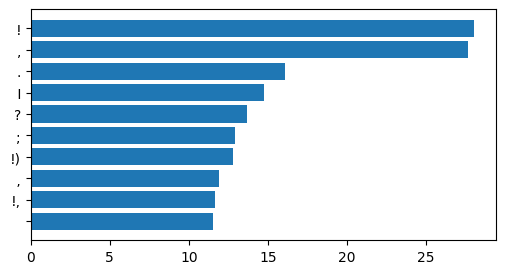

In [15]:
plot_top_logits(llm)

# Vary base case

In [16]:
# Force sequence of tokens to reflect the second choice for the first response token
prompt_vary = prompt_base + b" Sure"
tokens_vary = llm.tokenize(prompt_vary)

In [17]:
t22, g2 = start_generate(llm, tokens_vary)

Llama.generate: prefix-match hit


In [18]:
display_token(llm, t22)

29892 ,


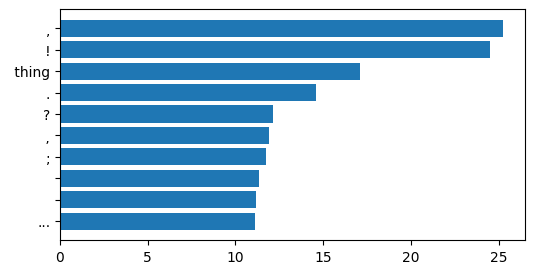

In [19]:
plot_top_logits(llm)

In [20]:
t23 = next(g2)
display_token(llm, t23)

306  I


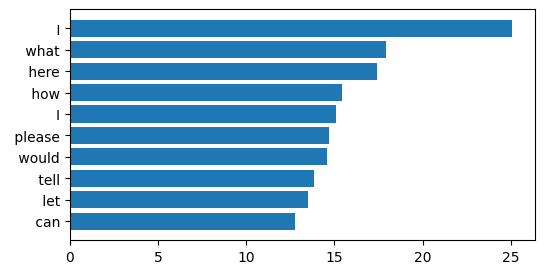

In [21]:
plot_top_logits(llm)